# Task 3

In [1]:
from vector_fields import read_vectorfield_data, estimate_vectors, solve_trajectory, create_phase_portrait_matrix, create_phase_portrait_derivative
from function_approximation import approx_lin_func, approx_nonlin_func, plot_func_over_data, compute_bases
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import numpy as np
import math

In [2]:
# Functions for solve_ivp

def rbf_approx(t, y):
    list_of_bases = np.empty(shape=(n_bases))
    for i, center_point in enumerate(centers):
        subtraction = np.subtract(center_point, y)  # note: center_point is a single point, points are many points -> broadcasting
        norm = np.linalg.norm(subtraction)
        basis = np.exp(-norm ** 2 / eps ** 2)
        list_of_bases[i] = basis
#     print(C.shape, list_of_bases.shape, (list_of_bases @ C).shape)
    return list_of_bases @ C

def linear_approx(t, y):
    return A @ y

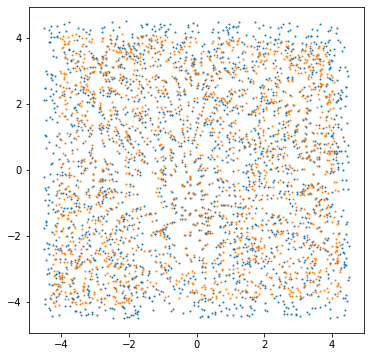

In [3]:
# read the vector field data
x0, x1 = read_vectorfield_data(base_filename="nonlinear_vectorfield_data")
fig, ax = plt.subplots(1,1,figsize=(6,6))
ax.scatter(x0[:,0], x0[:,1], s=1)
ax.scatter(x1[:,0], x1[:,1], s=1)
plt.show()

### Part 1
Try to approximate the vector field using linear approximation

In [4]:
# utilize delta_t, find delta_t giving lowest possible mse
dt = 0.1
end_time=0.5
plt.rcParams["figure.figsize"] = (14,14)
v = estimate_vectors(dt, x0, x1)
A, res, _, _ = approx_lin_func(data=(x0,v))
print("Residual error:",res)
x1_pred, best_dt, best_mse = solve_trajectory(x0, x1, linear_approx, find_best_dt=True, end_time=end_time, plot=False)
print(f"MSE value at {end_time} is: {np.linalg.norm(x1_pred-x1)**2 / x1.shape[0]}\n Best MSE value is found at time {best_dt} with MSE: {best_mse}")

Residual error: [3890.04548426 3563.97075073]
MSE value at 0.5 is: 0.2015206821878147
 Best MSE value is found at time 0.10101010101010102 with MSE: 0.03728816688355255


In [15]:
x0 + dt * x0 @ A, x1

(array([[-0.73982464,  1.89647747],
        [-4.45345791, -1.70593614],
        [-3.14642405, -3.51296479],
        ...,
        [ 4.20495773,  1.80651723],
        [-1.55015504, -3.67429315],
        [ 0.70991284,  2.01134303]]),
 array([[-0.79317039,  2.09824395],
        [-4.20066645, -1.95521799],
        [-3.32344627, -3.54971712],
        ...,
        [ 3.93738073,  1.83673157],
        [-1.79153043, -3.59123607],
        [ 0.78836138,  2.17869936]]))

Residual error: [3890.04548426 3563.97075073]


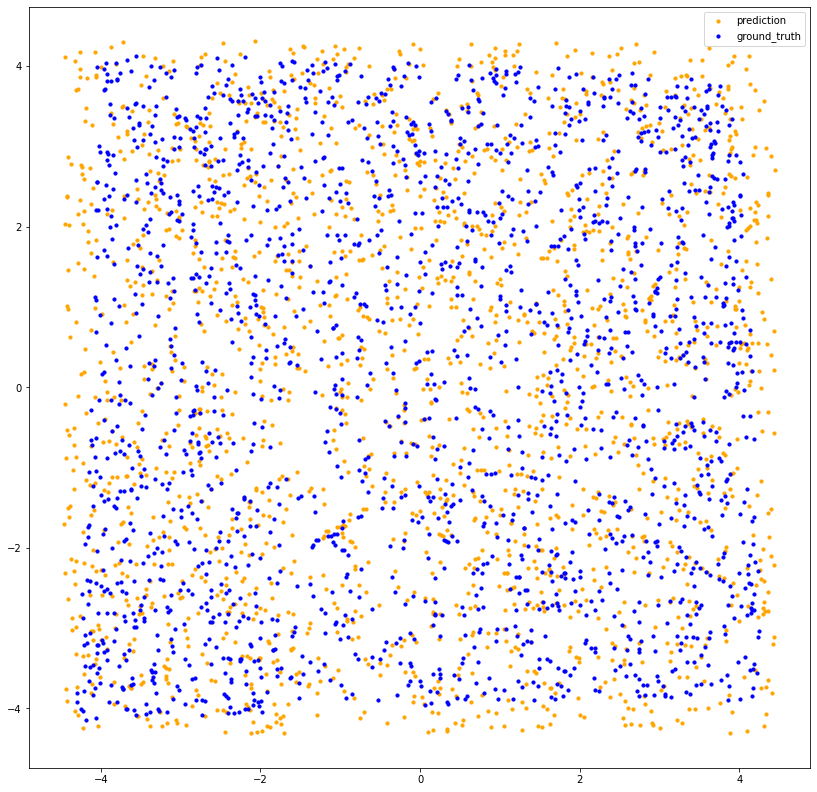

MSE value at 0.10101010101010102 is: 0.03728816688433024


In [5]:
# utilize best delta_t, plot results
dt = 0.1
end_time=best_dt
plt.rcParams["figure.figsize"] = (14,14)
v = estimate_vectors(dt, x0, x1)
A, res, _, _ = approx_lin_func(data=(x0,v))
print("Residual error:",res)
x1_pred, _, _ = solve_trajectory(x0, x1, linear_approx, find_best_dt=False, end_time=end_time, plot=False)
plt.scatter([el[0] for el in x1_pred], [el[1] for el in x1_pred], c='orange', s=10, label='prediction')
plt.scatter(x1[:,0], x1[:,1], c='blue', s=10, label='ground_truth')
plt.legend()
plt.show()
print(f"MSE value at {end_time} is: {np.linalg.norm(x1_pred-x1)**2 / x1.shape[0]}")

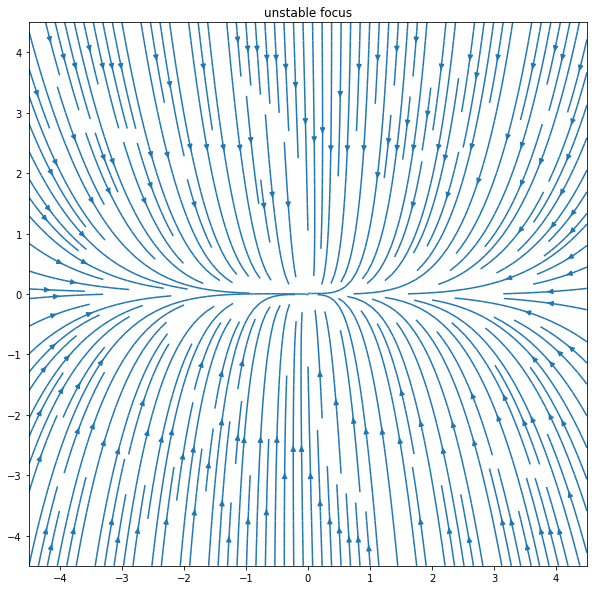

In [6]:
create_phase_portrait_derivative(linear_approx, title_suffix="unstable focus", display=False)

### Part 2
Try to approximate the vector field using radial basis functions (with the number of centers between
100 and 1000)

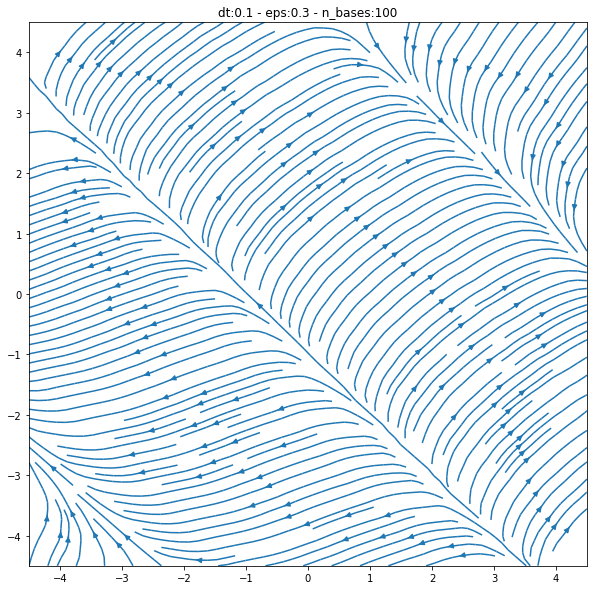

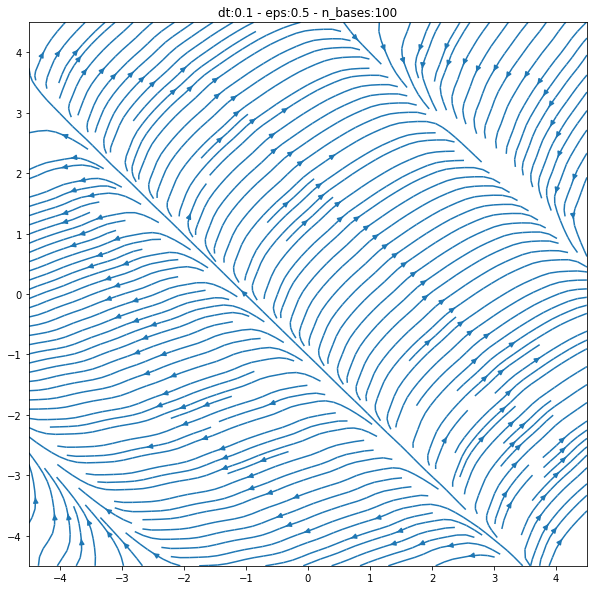

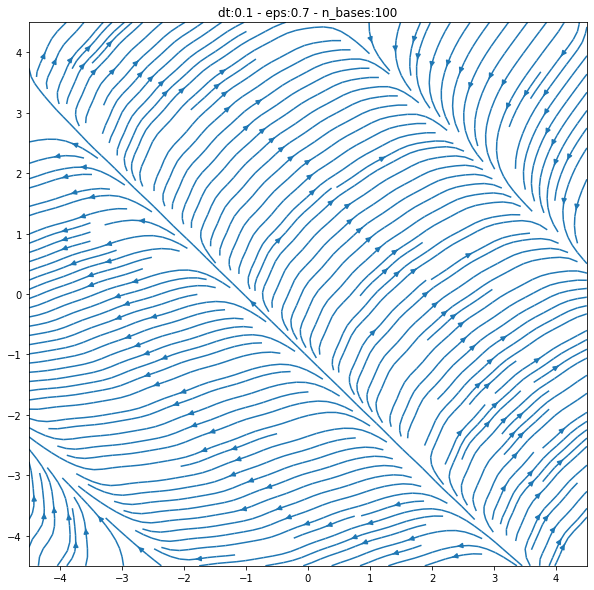

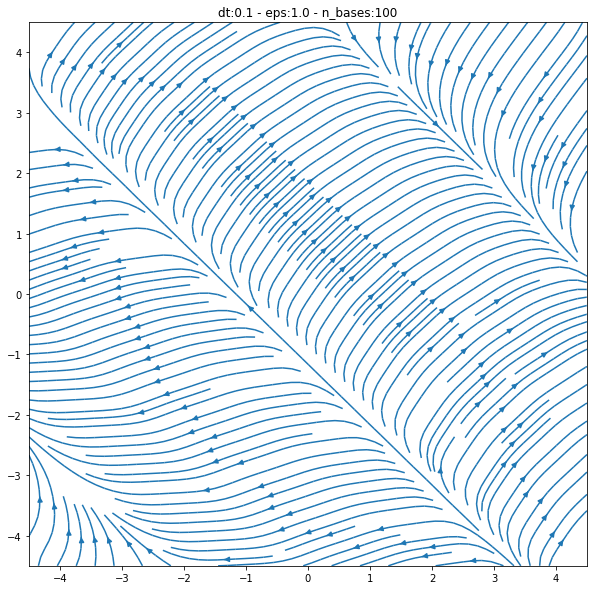

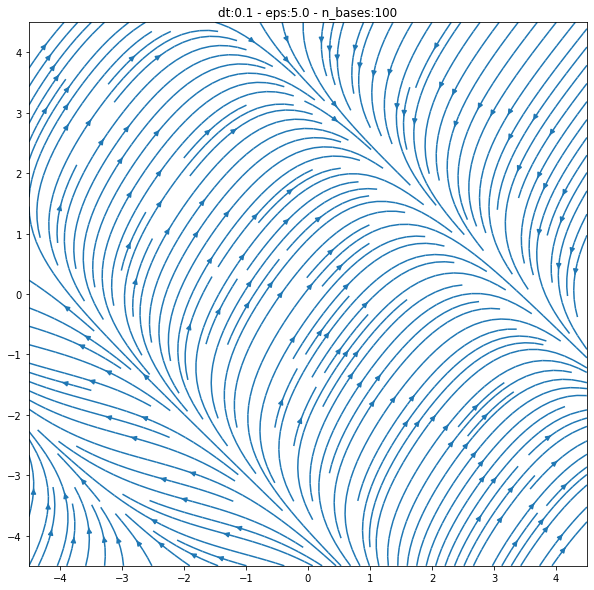

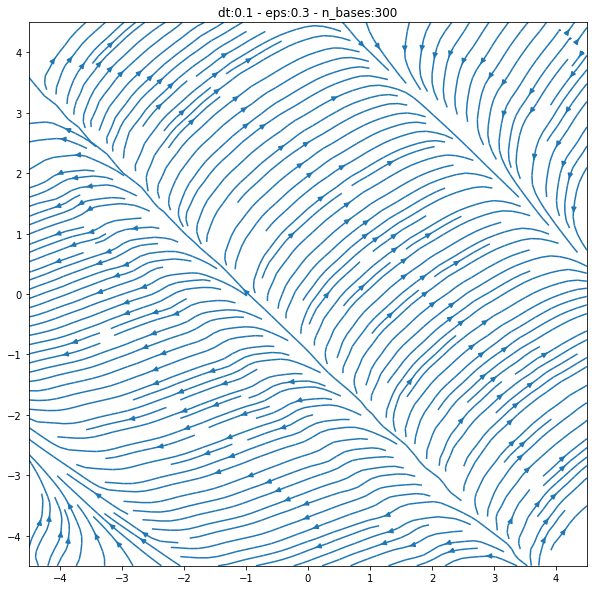

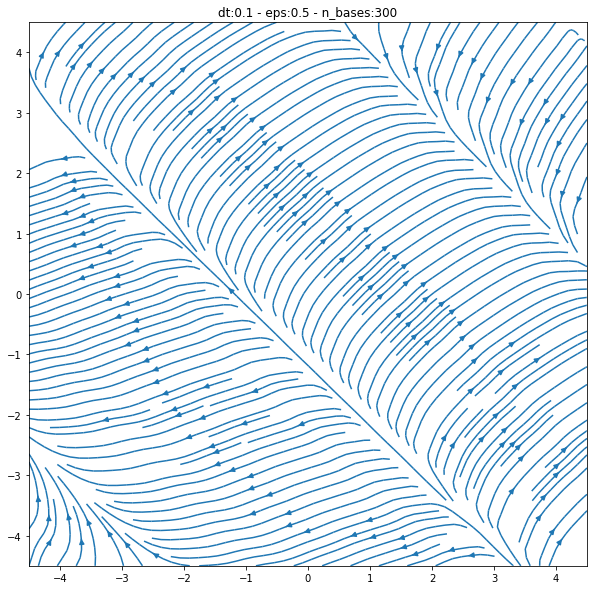

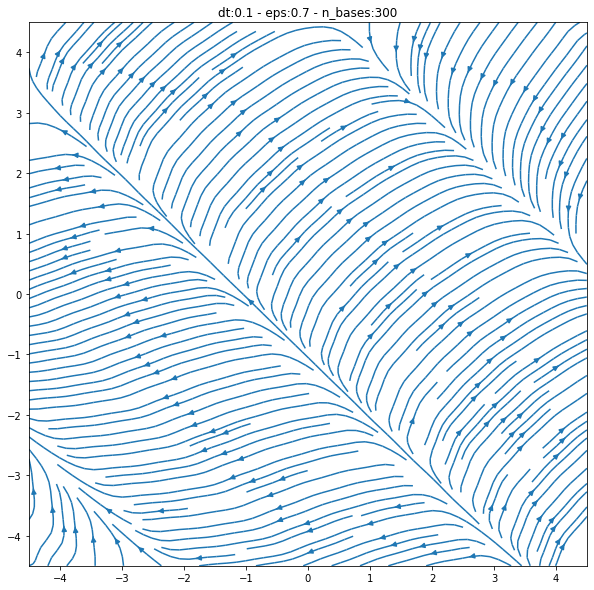

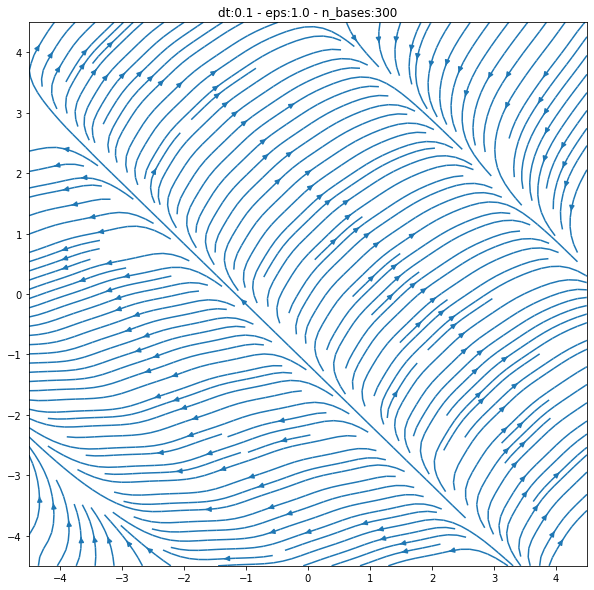

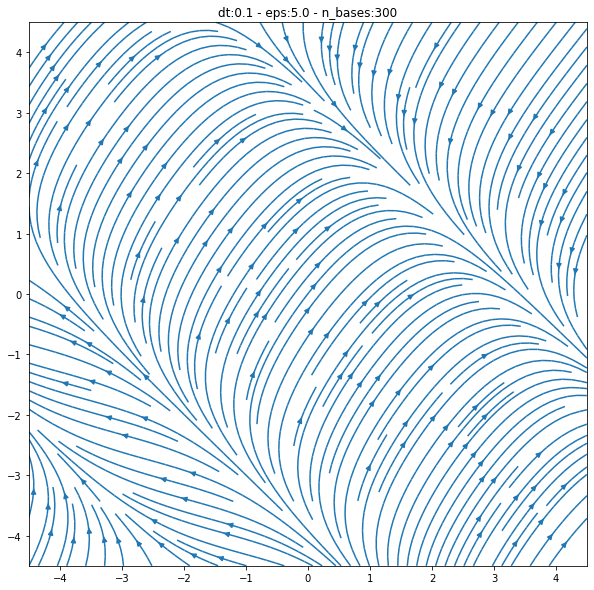

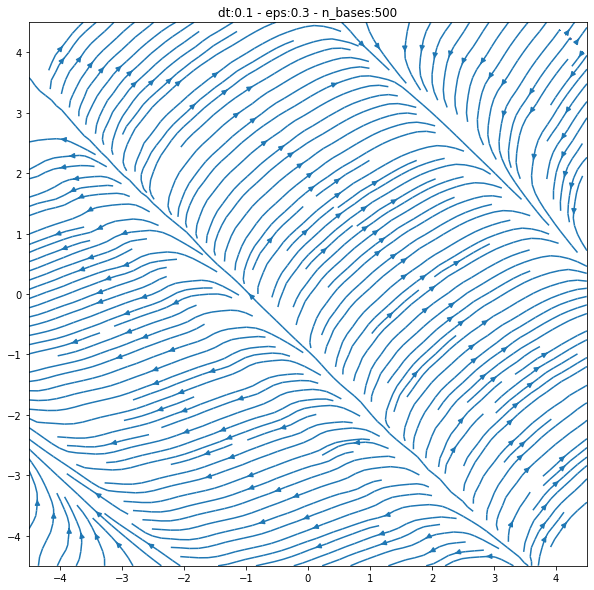

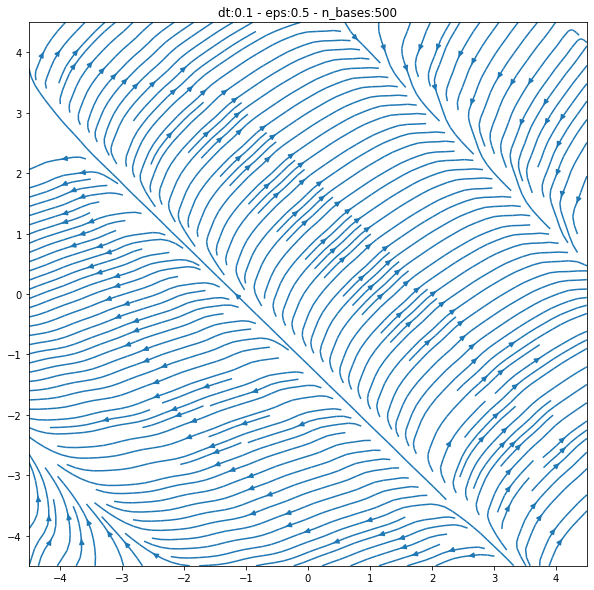

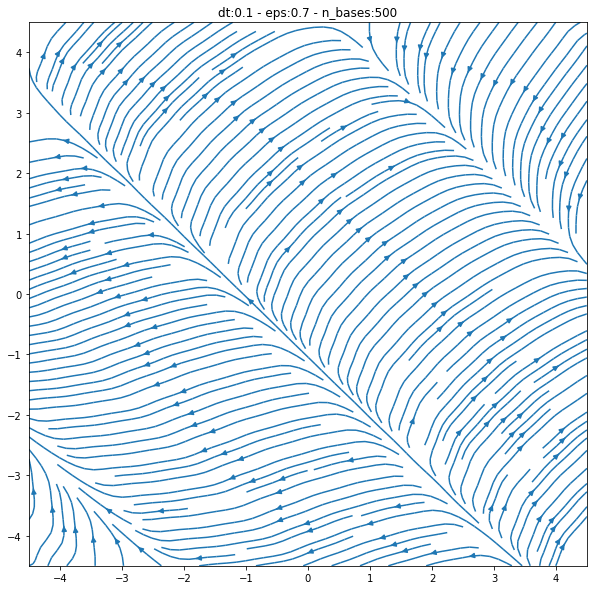

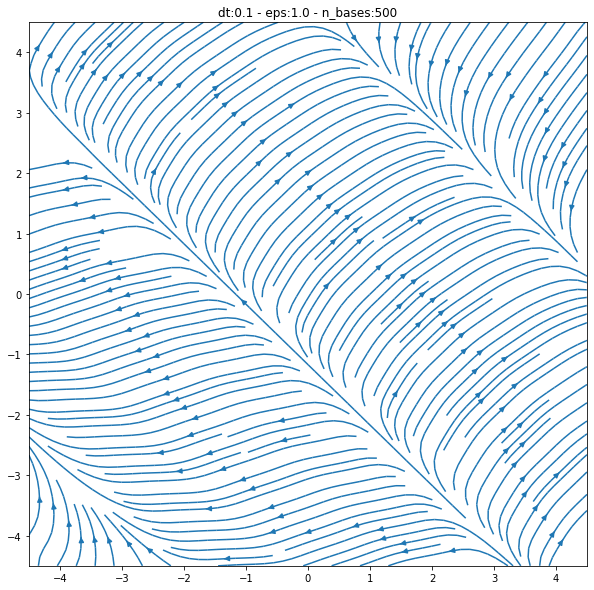

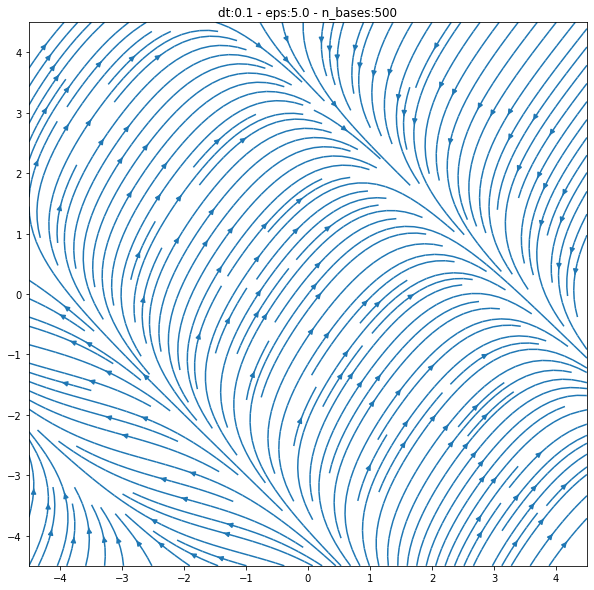

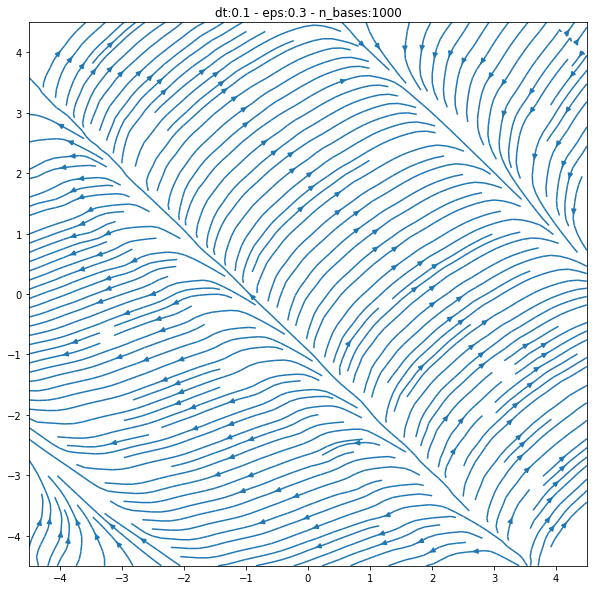

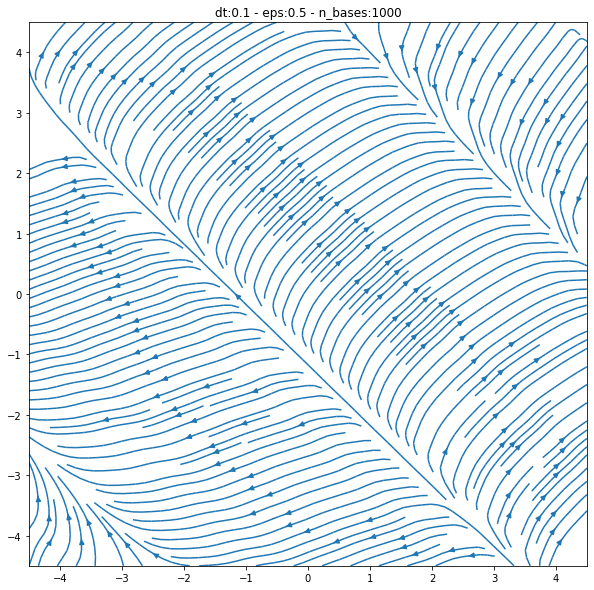

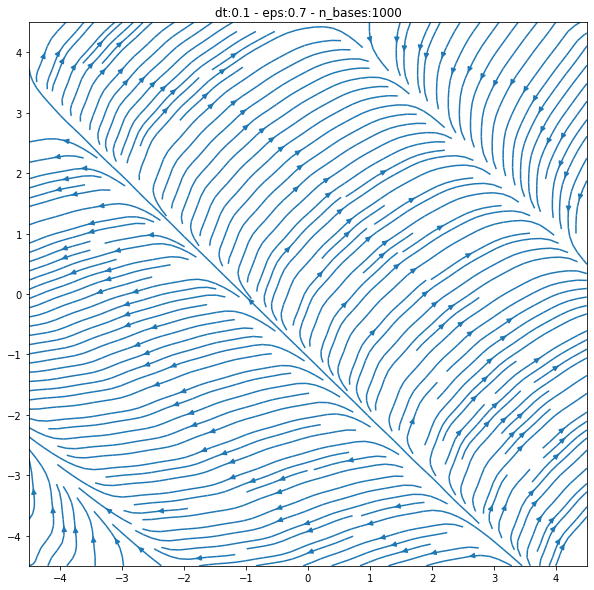

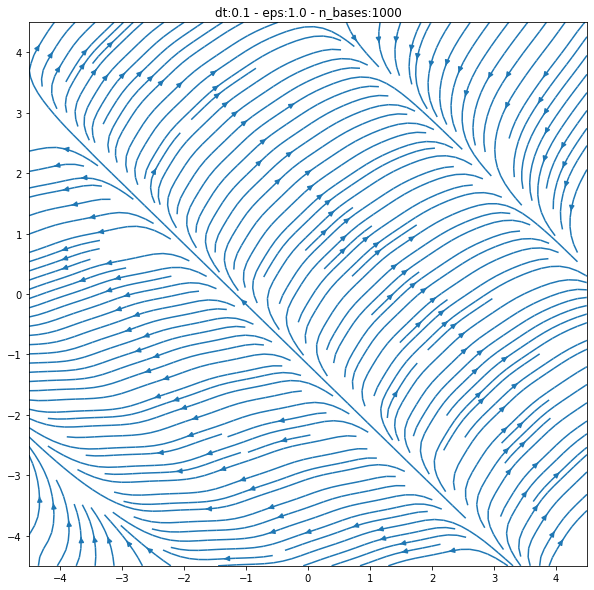

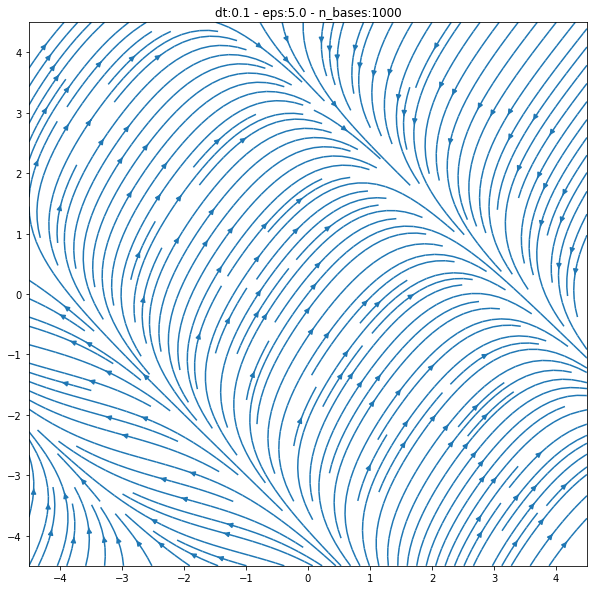

In [7]:
# trying different configurations!
dt = 0.1
for n_bases in (100, 300, 500, 1000):
    centers = np.random.choice(x0.ravel(), replace=False, size=n_bases)
    for eps in (0.3, 0.5, 0.7, 1.0, 5.0):
            v = estimate_vectors(dt, x0, x1)
            C, res, _, _, _, eps, phi = approx_nonlin_func(data=(x0,v), n_bases=n_bases, eps=eps, centers=centers)
            create_phase_portrait_derivative(rbf_approx, title_suffix=f"dt:{dt} - eps:{eps} - n_bases:{n_bases}", display=True)

In [8]:
# get the best dt and best mse possible
dt = 0.1
end_time=0.5
eps=0.7
n_bases=500
plt.rcParams["figure.figsize"] = (14,14)
v = estimate_vectors(dt, x0, x1)
centers = np.random.choice(x0.ravel(), replace=False, size=n_bases)
C, res, _, _, _, eps, phi = approx_nonlin_func(data=(x0,v), n_bases=n_bases, eps=eps, centers=centers)
print("Residual error:",res)
x1_pred, best_dt, best_mse = solve_trajectory(x0, x1, rbf_approx, find_best_dt=True, end_time=end_time, plot=False)
print(f"MSE value at {end_time} is: {np.linalg.norm(x1_pred-x1)**2 / x1.shape[0]}\n Best MSE value is found at time {best_dt} with MSE: {best_mse}")

Residual error: []
MSE value at 0.5 is: 0.09949933814105295
 Best MSE value is found at time 0.11111111111111112 with MSE: 0.04155106862165003


Residual error: []


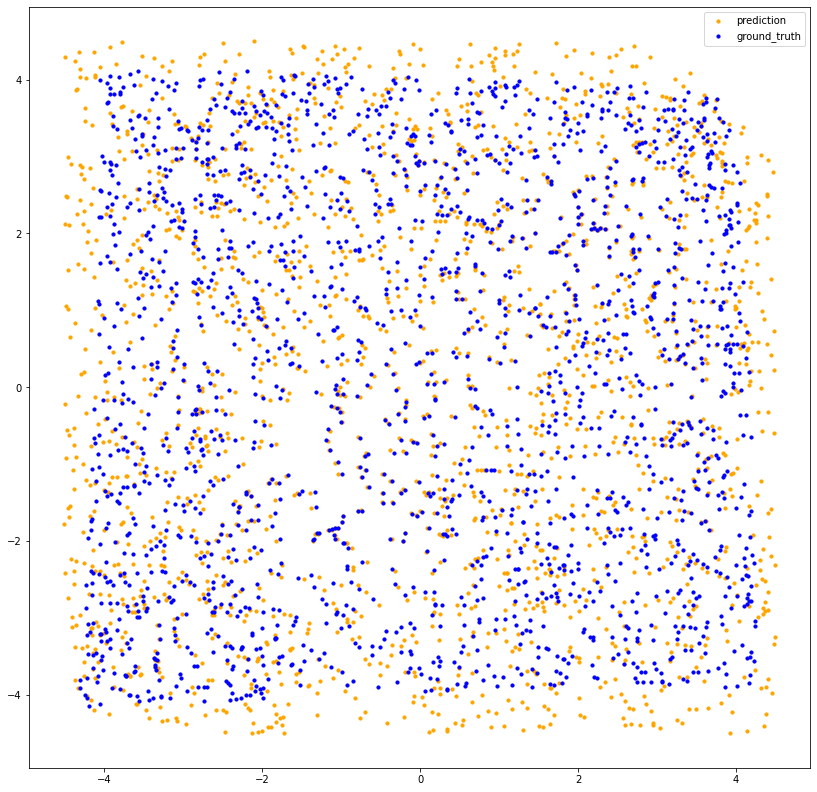

MSE value at 0.11111111111111112 is: 0.04155089889430515


In [9]:
# utilize best delta_t, plot results
dt = 0.1
end_time=best_dt
plt.rcParams["figure.figsize"] = (14,14)
v = estimate_vectors(dt, x0, x1)
C, res, _, _, _, eps, phi = approx_nonlin_func(data=(x0,v), n_bases=n_bases, eps=eps, centers=centers)
print("Residual error:",res)
x1_pred, _, _ = solve_trajectory(x0, x1, rbf_approx, find_best_dt=False, end_time=end_time, plot=False)
plt.scatter([el[0] for el in x1_pred], [el[1] for el in x1_pred], c='orange', s=10, label='prediction')
plt.scatter(x1[:,0], x1[:,1], c='blue', s=10, label='ground_truth')
plt.legend()
plt.show()
print(f"MSE value at {end_time} is: {np.linalg.norm(x1_pred-x1)**2 / x1.shape[0]}")

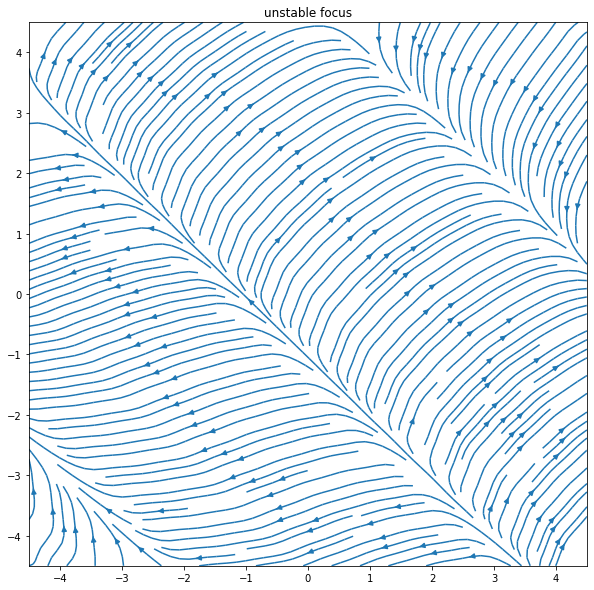

In [10]:
# show phase portrait for best configuration
create_phase_portrait_derivative(rbf_approx, title_suffix="unstable focus", display=False)

### Part 3
use the approximated vector field to solve the system for a larger time,
with all initial points x0

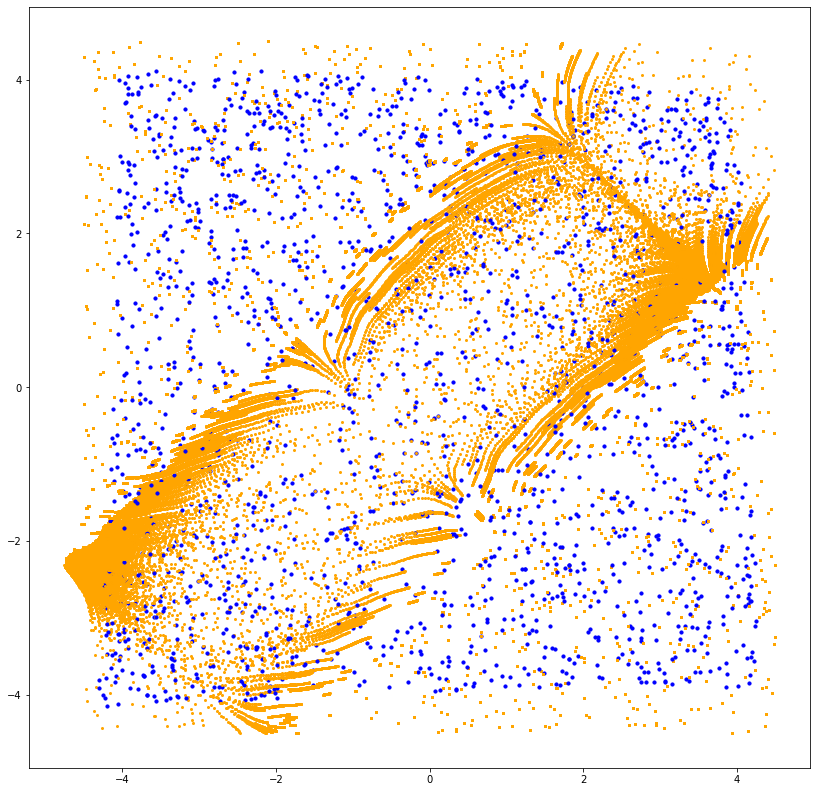

In [11]:
end_time = 50
_, _, _ = solve_trajectory(x0, x1, rbf_approx, find_best_dt=False, end_time=end_time, plot=True)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999


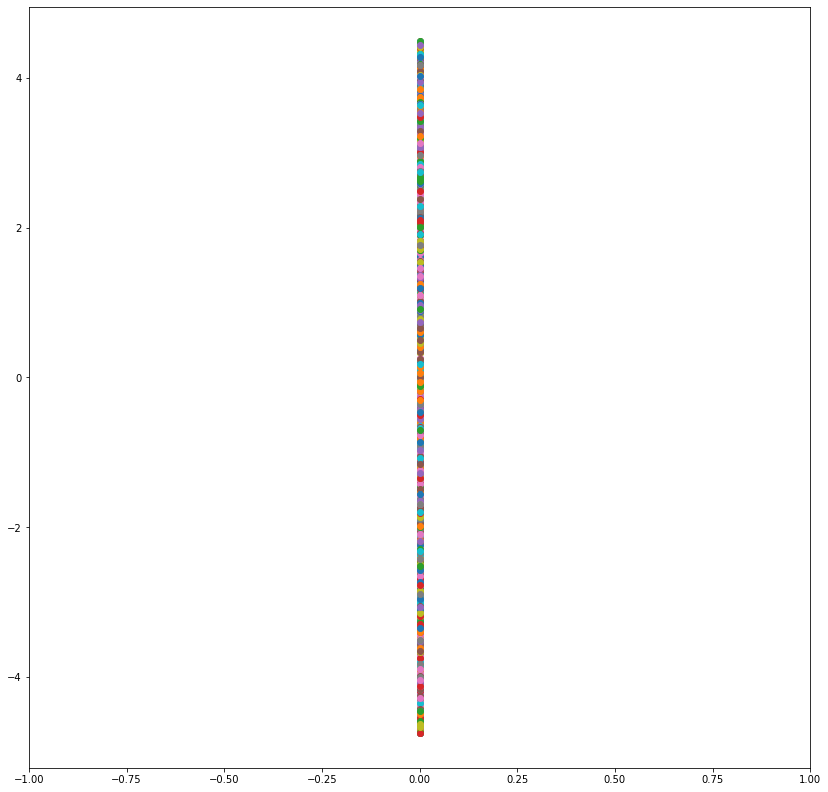

In [12]:
end_time = 50
t_eval = np.linspace(0, end_time, 200)
for i in range(len(x0)):
    print(i)
    sol = solve_ivp(rbf_approx, [0, end_time], x0[i], t_eval=t_eval)
    plt.scatter(0, sol.y[0,-1])
plt.xlim(-1, 1)
plt.show()